In [1]:
import json
import glob

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [3]:
import numpy as np

In [23]:
# files = glob.glob('ukraine_feb_21/*.json')
files = glob.glob('dumps2/*.json')

In [24]:
responses = []

for file in files:
    f = open(file)
    data = json.load(f)
    responses += data['data']

In [25]:
def date_score(metric):
    return datetime.strptime(metric['created_at'], '%Y-%m-%dT%H:%M:%S.%fZ').timestamp()

In [26]:
def metric_score(metric):
    return sum(metric['public_metrics'][key] for key in metric['public_metrics'])

In [27]:
responses.sort(key = date_score)

In [28]:
responses[-1]

{'text': "Student accuses Purdue police officer of using 'excessive force' | Campus | https://t.co/1nYtfJtXpj #fireselke #purdue #indiana https://t.co/5GwyQF4G2w",
 'source': 'Twitter for iPhone',
 'created_at': '2022-02-10T23:50:08.000Z',
 'public_metrics': {'retweet_count': 0,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0},
 'id': '1491922462002626580',
 'author_id': '42978665'}

In [60]:
def binify(responses, num_bins, date_search_value):
    
    search_position = datetime.strptime(date_search_value, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp()
    
    times_and_metrics = []
    
    date_position = 0

    for tweet in responses:
        times_and_metrics.append([date_score(tweet), metric_score(tweet)])
        
        if date_score(tweet) < search_position: date_position += 1
            
    start = min([val[0] for val in times_and_metrics])
    end = max([val[0] for val in times_and_metrics])
    
    shift = (end - start) / num_bins
    
    x_pos = [start + (i + 1) * shift for i in range(num_bins)]
    
    y_pos = []
    
    max_range = [0, 0]
    
    search_pos = 0
    score = 0
    max_score = 0
    
    for time in x_pos:
        
        score = 0
        
        while times_and_metrics[search_pos][0] < time:
            score += times_and_metrics[search_pos][1]
#             print(score)
#             score += 1
            search_pos += 1

        y_pos.append(score)
        
    x_pos = [datetime.fromtimestamp(time_elem) for time_elem in x_pos]
        
    return x_pos, y_pos, date_position / len(responses)
        

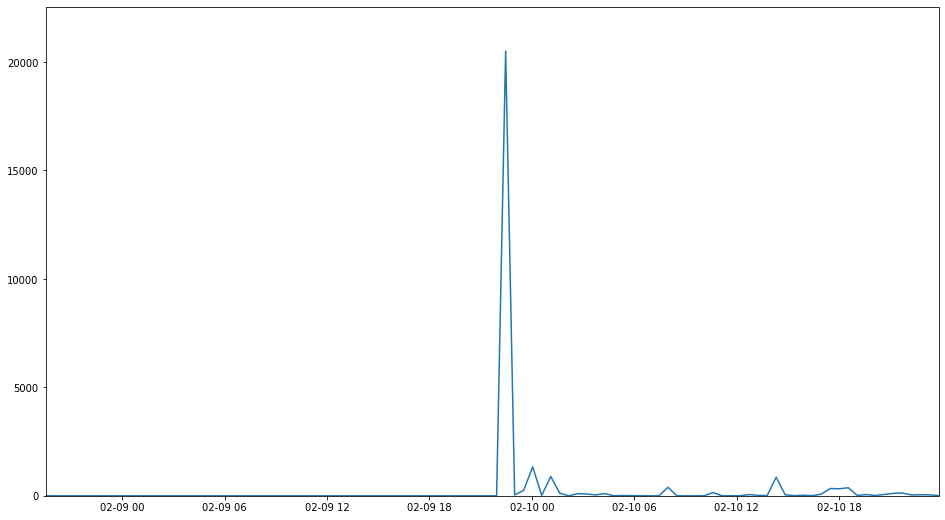

There are 165.78486222662735 times more tweets per hour from 2022-02-09T21:00:00.000Z to 2022-02-10 23:50:08 than from 2022-02-08 19:30:16.940000 to 2022-02-09T21:00:00.000Z


In [61]:
date_mid = '2022-02-09T21:00:00.000Z'

x_pos, y_pos, date_value = binify(responses, 100, date_mid)

# for tweet in responses[subset[0] : subset[1]]:
#     print(tweet)
#     print('____________________')

plt.figure(figsize=[16,9])
plt.xlim([x_pos[0], x_pos[-1]])
plt.ylim([0, max(y_pos) * 1.1])
plt.plot(x_pos, y_pos)
# plt.plot(x_pos[4:], np.convolve(y_pos, np.ones(5), 'valid') / 5)
plt.show()

# print(date_value)

rate_before = datetime.strptime(date_mid, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp() - x_pos[0].timestamp()

rate_after = x_pos[-1].timestamp() - datetime.strptime(date_mid, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp()

score = ((1 - date_value) / rate_after) / (date_value / rate_before)

print('There are', score, 'times more tweets per hour from', date_mid, 'to', x_pos[-1], 'than from', x_pos[0], 'to', date_mid)

In [32]:
# print(x_pos)
print(max(y_pos))
print(np.argmax(y_pos))
important_range = ranges[np.argmax(y_pos) - 5]
print(important_range)

# for tweet in responses[important_range[0]:important_range[1]]:
#     print(tweet['text'])
#     print('---------------------------')

25
56
[2, 5]


In [34]:
times = []

for response in responses:
    times.append(response['created_at'])
        
print(len(times))

351


[]

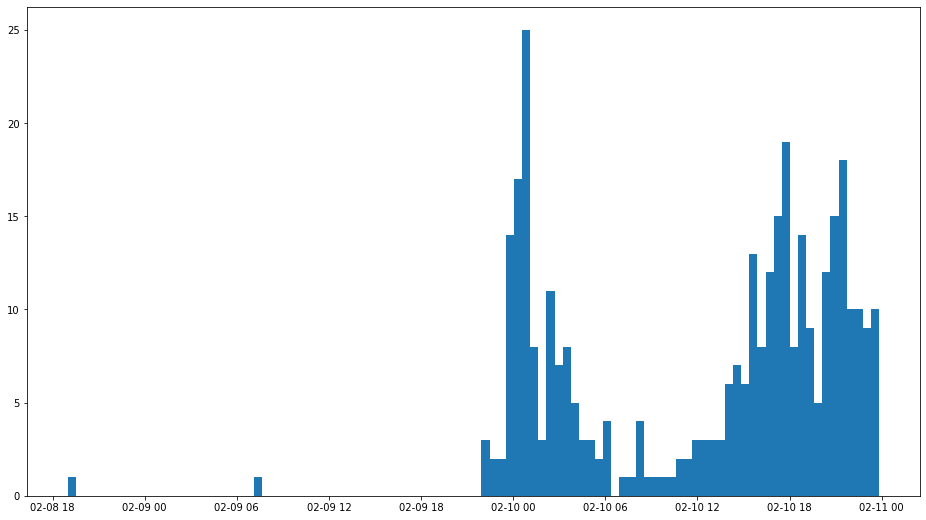

In [35]:
times_copy = pd.to_datetime(times)

# timestamps = [datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp() for time in times]

plt.figure(figsize=[16,9])
plt.hist(times_copy, bins = 100)
# plt.xlim([x_pos[0], x_pos[-1]])

# plt.xlabel('Date',fontsize=15)
# plt.ylabel('Num Tweets',fontsize=15)
# plt.title('Query: Purdue Police \n\n Tweet Distribution from: 2022-02-08 00:00:00 to 2022-02-10 23:59',fontsize=15)

plt.plot()

In [45]:
times[-1]

'2022-02-21T23:54:55.000Z'